# DAS-732 ASSIGNMENT-3 TEAM - GRAPHGEEKS
### MEMBERS:
- ASHIRWAD MISHRA IMT2022108 (Team Lead)
- KRISH PATEL IMT2022097
- VANSH SINHA IMT2022122

## Original Dataset description and Visual Analytics Workflow

![VA_Workflow](Workflow.png)

### Column-wise Description of Dataset

1. **Commodity Code**  
   - Code representing the commodity or industry from BEA Make and Use Tables 2012.  
   - Includes two levels: 'Detail' (405 sectors) and 'Summary' (medium resolution, 73 commodities & 71 industries).  

2. **Commodity Name**  
   - Name of the commodity or industry.  
   - Detail commodities use USEEIO v1.1 names.

3. **Substance**  
   - Greenhouse gases:  
     - CO2: Carbon dioxide  
     - CH4: Methane  
     - N2O: Nitrous oxide  
     - Other GHGs: HFCs, CF4, SF6, etc.

4. **Unit**  
   - Emission factors in CO2e (carbon dioxide equivalents) using IPCC AR4 GWP factors.  
   - Purchaser price includes producer price + margins.

5. **Supply Chain Emission Factors without Margins**  
   - GHG emissions from cradle to production point (kg) per 2018 USD.

6. **Margins of Supply Chain Emission Factors**  
   - GHG emissions from production to sale (kg) per 2018 USD.

7. **Supply Chain Emission Factors with Margins**  
   - GHG emissions from cradle to sale (kg) per 2018 USD.

8. **DQ Reliability Score of Factors without Margins**  
   - Data reliability score (1 = best, 5 = worst).  

9. **DQ Temporal Correlation of Factors without Margins**  
   - Temporal correlation score (1 = best, 5 = worst).  

10. **DQ Geographical Correlation of Factors without Margins**  
    - Geographical correlation score (1 = best, 5 = worst).  

11. **DQ Technological Correlation of Factors without Margins**  
    - Technological correlation score (1 = best, 5 = worst).  

12. **DQ Data Collection of Factors without Margins**  
    - Data collection score (1 = best, 5 = worst).  

13. **Year**  
    - Added column indicating the year of data recording (created during dataset cleaning).


### Additional Dataset is quite comprehensive and not all of it was used in this assignment, hence would be described whenever invoked into a workflow iteration.

## VISUAL ANALYTICS WORKFLOW

- **Choose Dataset for Model Training:**  
  The workflow begins with selecting a dataset for model training. This dataset contains the primary emission data used for analysis.

- **Emission Data and Additional Data:**  
  These are the primary sources of information. *Emission data* represents the core dataset, while *additional data* complements it by providing supplementary information.

- **Cleaning Process:**  
  The raw data (both emission and additional) undergoes a cleaning process to ensure consistency, completeness, and readiness for analysis. This process removes invalid or missing values, standardizes formats, and prepares the datasets for downstream tasks.

- **Clean Emission Data and Clean Additional Data:**  
  After the cleaning process, the emission and additional datasets are stored separately as cleaned datasets. These cleaned datasets are critical for ensuring accurate analysis and visualization.

- **Visualizations:**  
  Cleaned datasets are transformed into visual representations, facilitating the mapping of data insights. These visualizations highlight patterns, trends, and anomalies in the emission data and serve as a precursor for further modeling.

- **Model:**  
  This component involves the application of machine learning or statistical models on the cleaned data. Models are trained to extract inferences, predict trends, and provide actionable insights.

- **Knowledge:**  
  The end goal of the workflow is to convert data into knowledge. Insights derived from visualizations and models are aggregated, validated, and presented as meaningful knowledge to stakeholders.


- **Subflow-1:**  
  Connects visualizations to the knowledge component with a feedback loop for iterative refinement of visual representations, enhancing data interpretation.

- **Subflow-2:**  
  Links cleaned additional data to visualizations and knowledge. Introduces a feedback loop to refine how supplementary information enriches the analysis.

- **Subflow-3:**  
  Focuses on applying machine learning models. Involves selecting, cleaning, and preparing datasets (emission or additional data) and training ML models to extract insights.


## TASKS UNDERTAKEN IN THIS ASSIGNMENT:
- **Task 1: Industry-Level Emissions Over Time:**  
  Analyze historical GHG emissions by industries to identify trends, key contributors, and changes over time.

- **Task 2: Commodity-Specific Emissions and Their Drivers:**  
  Examine the link between commodity sales and emissions to identify high-emission products and their drivers.

- **Task 3: Deeper Analysis into Specific Sectors' Emissions:**  
  Perform detailed evaluations of emissions within sectors to explore variability and high-emission sub-sectors.


# IMT2022122 (Vansh Sinha)

In [1]:
#To supress Future Warning of Pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
#Importing the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15.0
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Dataset Assessment (EDA)

In [2]:
sc = pd.read_csv('old/Summary_Commodity.csv')
dc = pd.read_csv('old/Detail_Commodity.csv')

In [3]:
#Top 5 commodities for each of substance on basis of emissions
substance_top_comm = sc[['Commodity Name','Substance','Supply Chain Emission Factors with Margins']].groupby(by=['Substance',"Commodity Name"]).agg('sum')\
.apply(lambda x : x.sort_values(ascending=False)).groupby(level=0).head(5).sort_values(by='Supply Chain Emission Factors with Margins',ascending=False)\
.reset_index()
substance_top_comm = substance_top_comm[substance_top_comm['Supply Chain Emission Factors with Margins']>0]

In [4]:
#Function for plotting sunburst
import plotly.graph_objects as go

def plot_sunburst_for_substance(substance, substance_top_comm):
    # Filter data for the given substance
    df_comm = substance_top_comm[substance_top_comm['Substance'] == substance]

    # Create the Sunburst plot
    fig = go.Figure()

    # Add the Sunburst chart
    fig.add_trace(
        go.Sunburst(
            labels=df_comm['Commodity Name'].tolist(),
            parents=df_comm['Substance'].tolist(),
            values=df_comm['Supply Chain Emission Factors with Margins'].tolist(),
            branchvalues="total",
            marker=dict(colors=df_comm['Supply Chain Emission Factors with Margins']),
            textinfo="label+percent entry",
            textfont=dict(size=30)
        )
    )

    # Update layout settings
    fig.update_layout(
        title=dict(
            text=f'Supply Chain Emissions for {substance.capitalize()} by Commodity',
            font=dict(size=20)
        ),
        width=800,
        height=800
    )

    # Show the plot
    fig.show()


In [5]:
#Function for plotting treemap
import plotly.graph_objects as go

def plot_treemap_for_substance(substance, substance_top_comm):
    # Filter data for the given substance
    df_comm = substance_top_comm[substance_top_comm['Substance'] == substance]

    # Create the Treemap plot
    fig = go.Figure()

    # Add the Treemap chart
    fig.add_trace(
        go.Treemap(
            labels=df_comm['Commodity Name'].tolist(),
            parents=df_comm['Substance'].tolist(),
            values=df_comm['Supply Chain Emission Factors with Margins'].tolist(),
            marker=dict(colors=df_comm['Supply Chain Emission Factors with Margins']),
            textinfo="label+value+percent parent",
            textfont=dict(size=20)
        )
    )

    # Update layout settings
    fig.update_layout(
        title=dict(
            text=f'Supply Chain Emissions for {substance.capitalize()} by Commodity',
            font=dict(size=20)
        ),
        width=800,
        height=800
    )

    # Show the plot
    fig.show()


## Sunburst

In [6]:
plot_sunburst_for_substance('carbon dioxide',substance_top_comm)

In [7]:
plot_sunburst_for_substance('methane',substance_top_comm)

In [8]:
plot_sunburst_for_substance('nitrous oxide',substance_top_comm)

In [9]:
plot_sunburst_for_substance('other GHGs',substance_top_comm)

## Data Processing

In [10]:
#Common umbrella
ext_labels = ['Oil and gas extraction', 'Mining, except oil and gas','Support activities for mining','Petroleum and coal products',
'Nonmetallic mineral products']
ext_index = sc[sc['Commodity Name'].isin(ext_labels)].index
sc.loc[ext_index,'Commodity Name']="Extractives"

In [11]:
index = sc[sc['Commodity Name'].str.contains('transportation')].index

In [12]:
sc.loc[index,'Commodity Name']='Transportation'

In [13]:
#Top 3 commodies for each substance on basis of emissions
substance_top_comm = sc[['Commodity Name','Substance','Supply Chain Emission Factors with Margins']].groupby(by=['Substance',"Commodity Name"]).agg('sum')\
.apply(lambda x : x.sort_values(ascending=False)).groupby(level=0).head(3).sort_values(by='Supply Chain Emission Factors with Margins',ascending=False)\
.reset_index()
substance_top_comm = substance_top_comm[substance_top_comm['Supply Chain Emission Factors with Margins']>0]

## TreeMap

In [14]:
plot_treemap_for_substance('carbon dioxide',substance_top_comm)

In [15]:
plot_treemap_for_substance('methane',substance_top_comm)

In [16]:
plot_treemap_for_substance('nitrous oxide',substance_top_comm)

In [17]:
plot_treemap_for_substance('other GHGs',substance_top_comm)

## Trend Analysis

In [18]:
# Trends based on individual subtance
sc_meaningful = sc[['Year','Commodity Name','Substance','Supply Chain Emission Factors with Margins']]
sc_grouped = sc_meaningful.groupby(['Year','Commodity Name', 'Substance']).agg('sum').reset_index()
GHG = sc_grouped[sc_grouped['Substance']=='other GHGs'].sort_values('Supply Chain Emission Factors with Margins',ascending=False)
CO2 = sc_grouped[sc_grouped['Substance']=='carbon dioxide'].sort_values('Supply Chain Emission Factors with Margins',ascending=False)
N2O = sc_grouped[sc_grouped['Substance']=='nitrous oxide'].sort_values('Supply Chain Emission Factors with Margins',ascending=False)
CH4 = sc_grouped[sc_grouped['Substance']=='methane'].sort_values('Supply Chain Emission Factors with Margins',ascending=False)

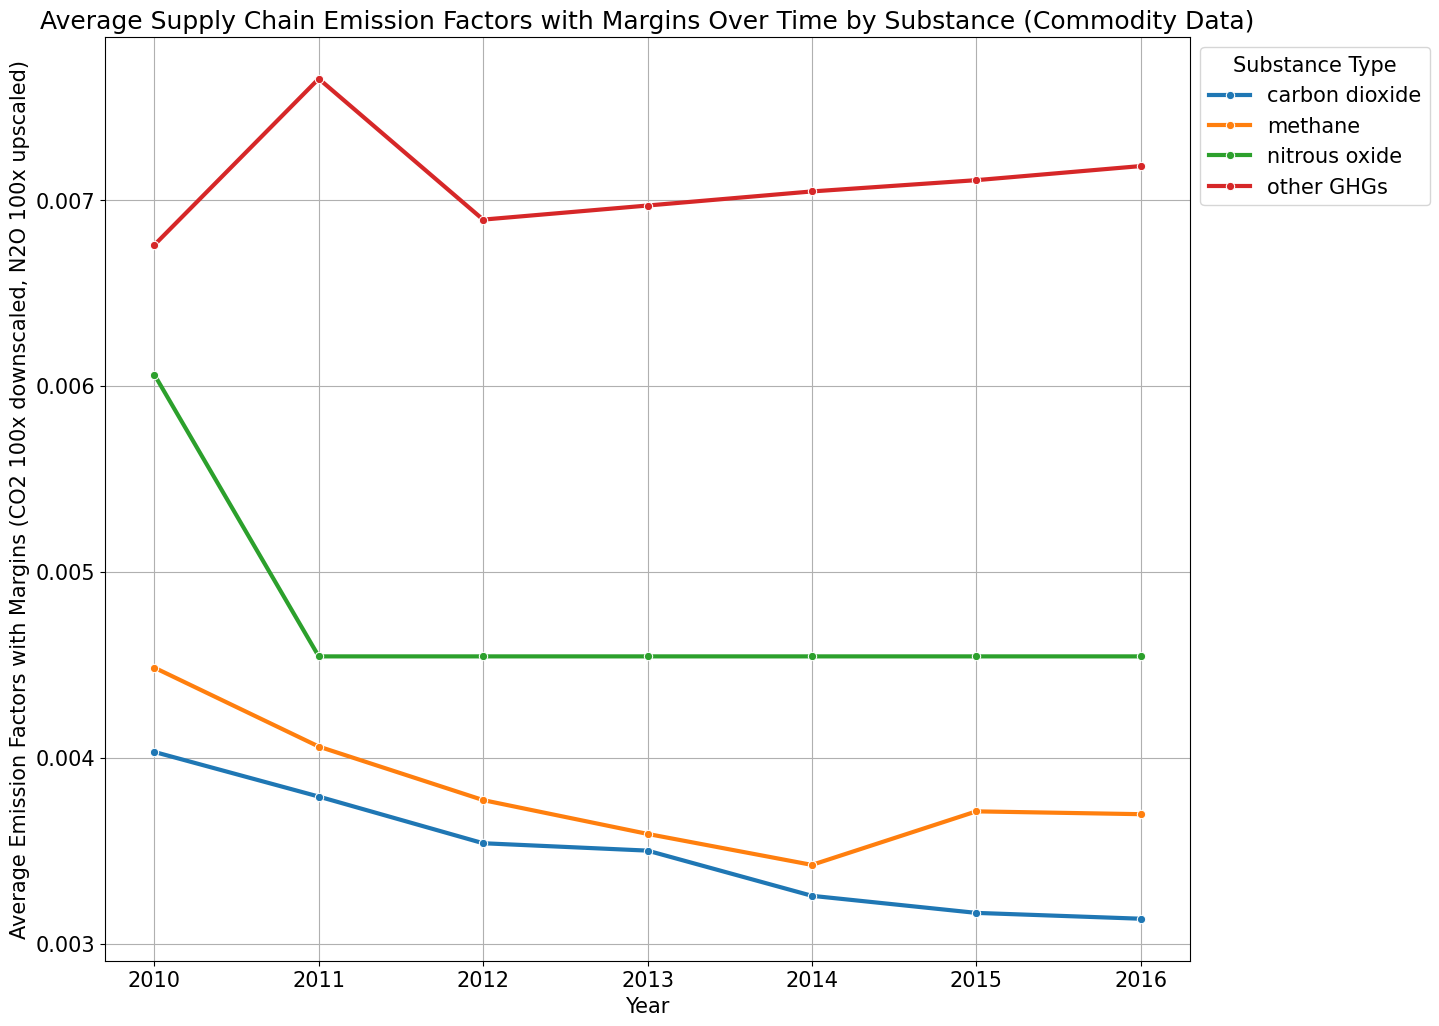

In [19]:
# Creating a copy of the data to adjust the values for better visualization
commodity_df_adj = sc.copy(deep=True)
#industry_df_adj = si.copy(deep=True)

# Adjusting the values of 'Supply Chain Emission Factors with Margins' for 'carbon dioxide' to enhance visualization
commodity_df_adj.loc[commodity_df_adj['Substance'] == 'carbon dioxide', 'Supply Chain Emission Factors with Margins'] /= 100
commodity_df_adj.loc[commodity_df_adj['Substance'] == 'nitrous oxide', 'Supply Chain Emission Factors with Margins'] *= 100
#industry_df_adj.loc[industry_df_adj['Substance'] == 'carbon dioxide', 'Supply Chain Emission Factors with Margins'] /= 100
#industry_df_adj['Substance'] = industry_df_adj['Substance'].apply(lambda x : x+"_Ind")
#commodity_df_adj['Substance'] = commodity_df_adj['Substance'].apply(lambda x : x+"_Comm")

# Set up the figure size for better visibility
plt.figure(figsize=(14, 12))

# Plot for Commodity data - Relationship with Time for 'Supply Chain Emission Factors with Margins' grouped by 'Substance'
sns.lineplot(data=commodity_df_adj, x='Year', y='Supply Chain Emission Factors with Margins', 
             hue='Substance', ci=None, marker='o', palette='tab10',linewidth = 3)

# Plot for Industry data - Relationship with Time for 'Supply Chain Emission Factors with Margins' grouped by 'Substance'
# sns.lineplot(data=industry_df_adj, x='Year', y='Supply Chain Emission Factors with Margins', 
#              hue='Substance', ci=None, marker='o', palette='tab10', linestyle='dotted',linewidth = 3)

# Adding title and labels
plt.title('Average Supply Chain Emission Factors with Margins Over Time by Substance (Commodity Data)')
plt.xlabel('Year')
plt.ylabel('Average Emission Factors with Margins (CO2 100x downscaled, N2O 100x upscaled)')
plt.grid(True)
plt.legend(title='Substance Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


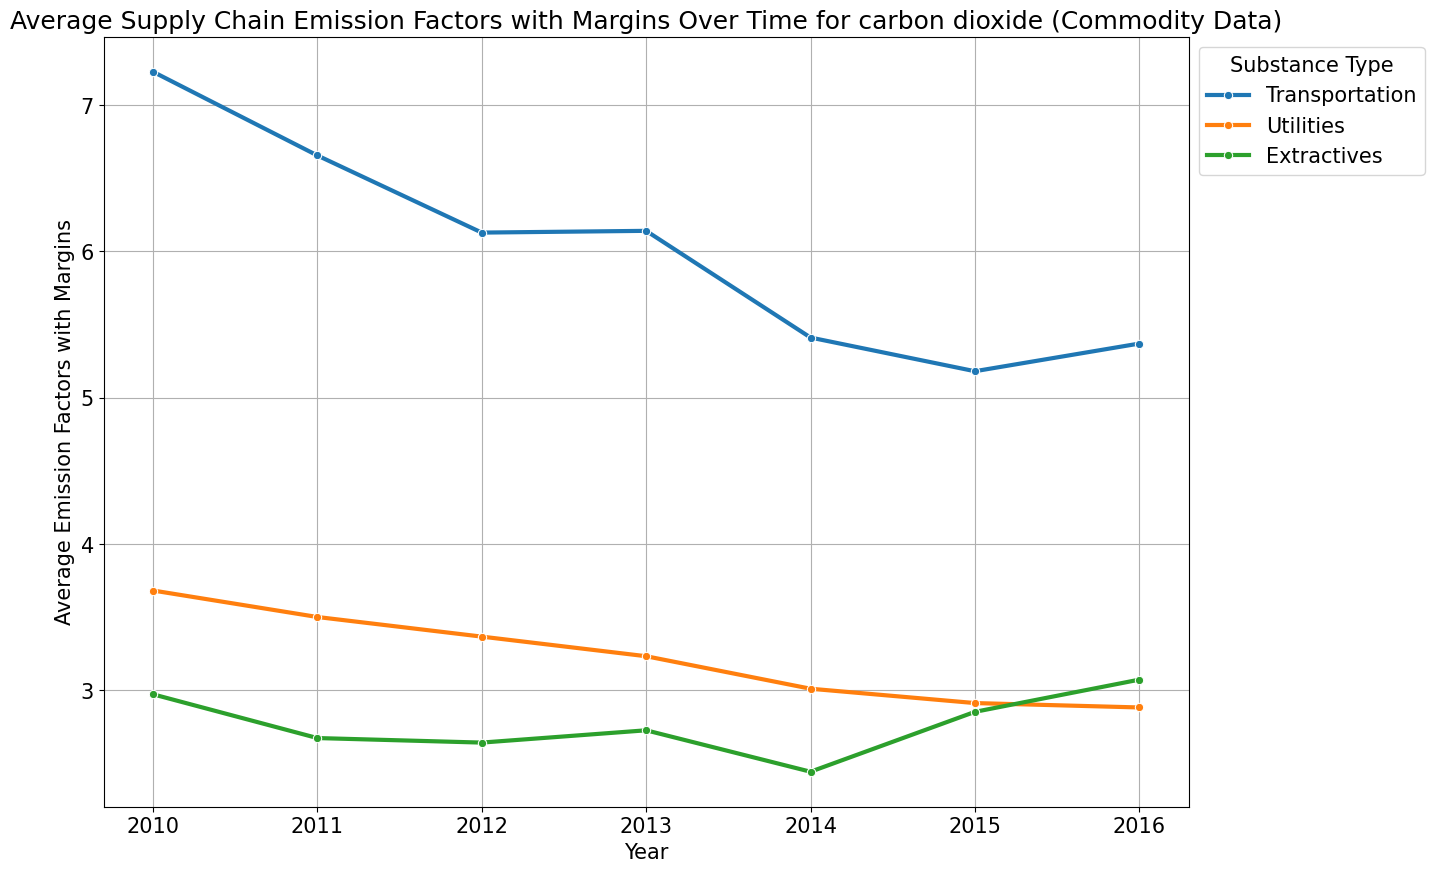

In [20]:
# Creating a copy of the data to adjust the values for better visualization
CO2 = CO2[CO2['Commodity Name'].isin(['Transportation','Utilities','Extractives'])]
# commodity_df_adj = sc[sc['Commodity Name'].isin(['Transportation','Machinery','Primary metals'])]\
# .sort_values(by='Supply Chain Emission Factors with Margins',ascending=False)\
# .copy(deep=True)
# commodity_df_adj = commodity_df_adj[commodity_df_adj['Substance']=='other GHGs']
# #industry_df_adj = si.copy(deep=True)

# # Adjusting the values of 'Supply Chain Emission Factors with Margins' for 'carbon dioxide' to enhance visualization
# commodity_df_adj.loc[commodity_df_adj['Substance'] == 'carbon dioxide', 'Supply Chain Emission Factors with Margins'] /= 100
# commodity_df_adj.loc[commodity_df_adj['Substance'] == 'nitrous oxide', 'Supply Chain Emission Factors with Margins'] *= 100


# Set up the figure size for better visibility
plt.figure(figsize=(14, 10))

# Plot for Commodity data - Relationship with Time for 'Supply Chain Emission Factors with Margins' grouped by 'Substance'
sns.lineplot(data=CO2, x='Year', y='Supply Chain Emission Factors with Margins', 
             hue='Commodity Name', ci=None, marker='o', palette='tab10',linewidth = 3)

# Adding title and labels
plt.title('Average Supply Chain Emission Factors with Margins Over Time for carbon dioxide (Commodity Data)')
plt.xlabel('Year')
plt.ylabel('Average Emission Factors with Margins')
plt.grid(True)
plt.legend(title='Substance Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


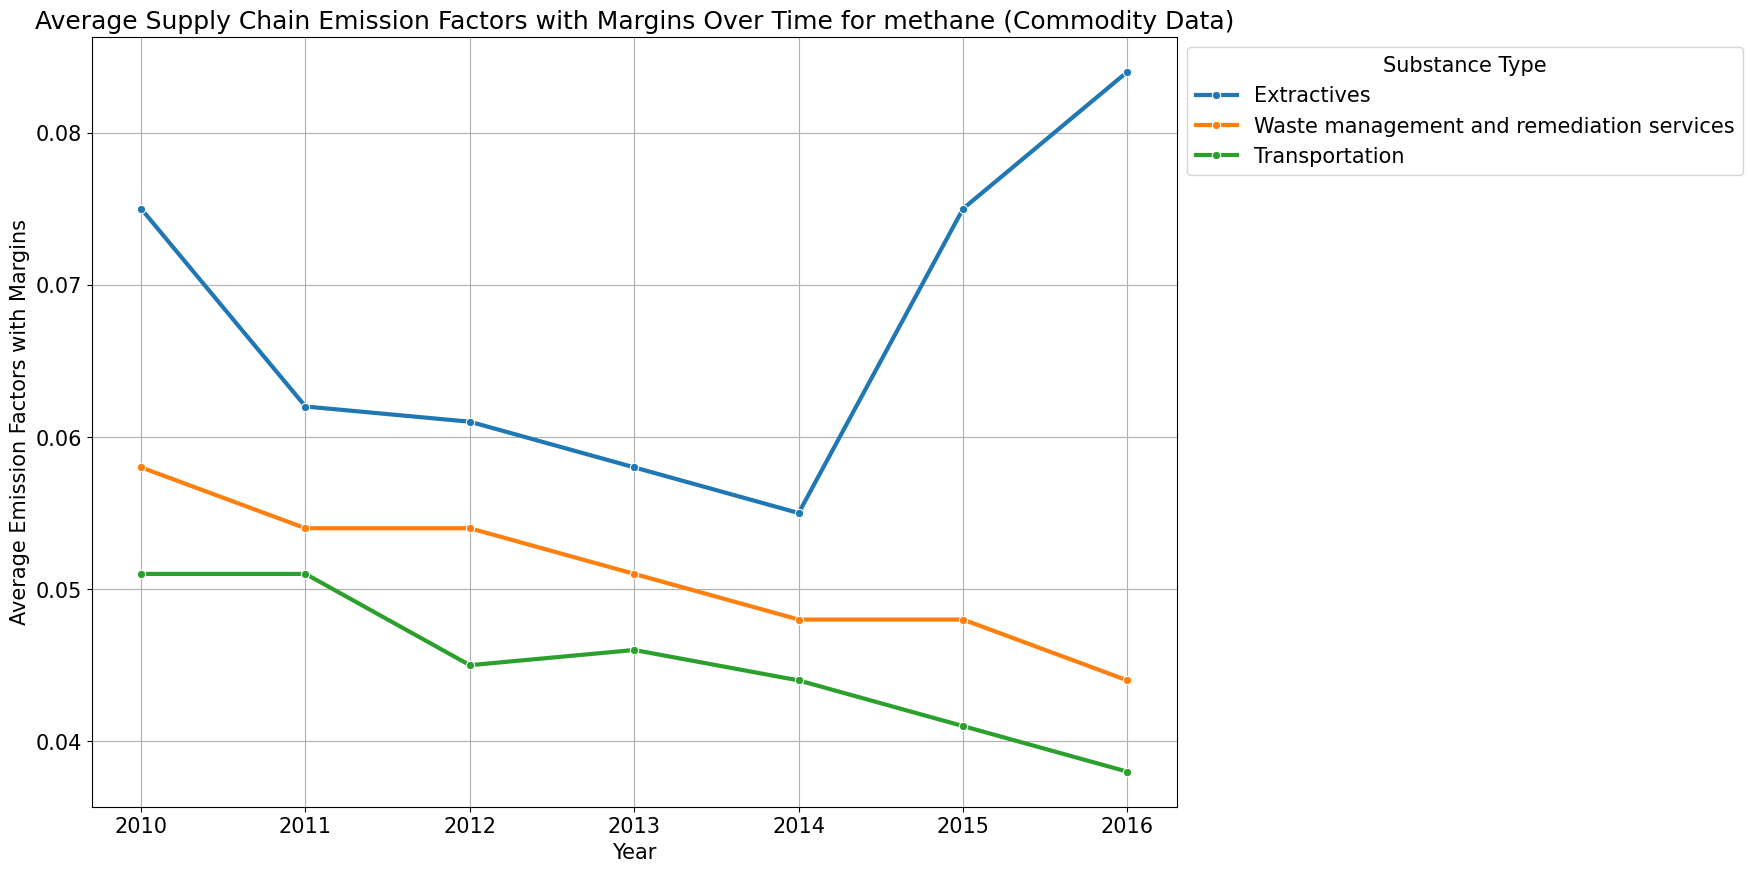

In [21]:
# Creating a copy of the data to adjust the values for better visualization
CH4 = CH4[CH4['Commodity Name'].isin(['Extractives','Transportation','Waste management and remediation services'])]
#industry_df_adj = si.copy(deep=True)

# Adjusting the values of 'Supply Chain Emission Factors with Margins' for 'carbon dioxide' to enhance visualization

#commodity_df_adj.loc[commodity_df_adj['Substance'] == 'nitrous oxide', 'Supply Chain Emission Factors with Margins'] *= 100


# Set up the figure size for better visibility
plt.figure(figsize=(14, 10))

# Plot for Commodity data - Relationship with Time for 'Supply Chain Emission Factors with Margins' grouped by 'Substance'
sns.lineplot(data=CH4, x='Year', y='Supply Chain Emission Factors with Margins', 
             hue='Commodity Name', ci=None, marker='o', palette='tab10',linewidth = 3)

# Adding title and labels
plt.title('Average Supply Chain Emission Factors with Margins Over Time for methane (Commodity Data)')
plt.xlabel('Year')
plt.ylabel('Average Emission Factors with Margins')
plt.grid(True)
plt.legend(title='Substance Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


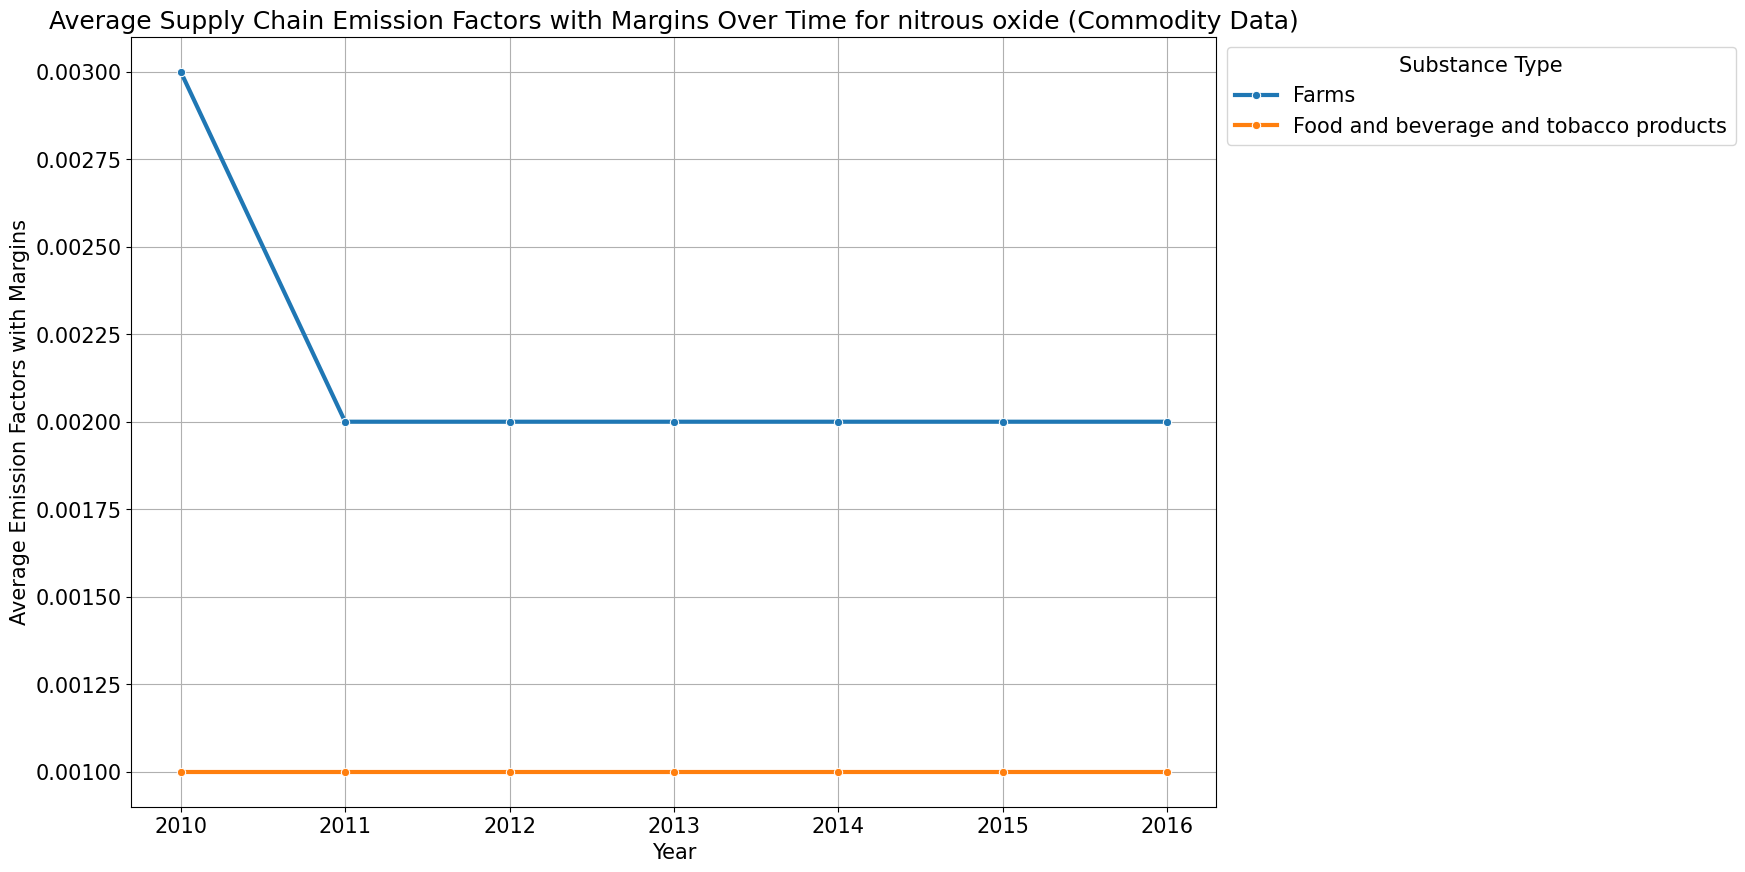

In [22]:
# Creating a copy of the data to adjust the values for better visualization
N2O = N2O[N2O['Commodity Name'].isin(['Farms','Food and beverage and tobacco products'])]

#industry_df_adj = si.copy(deep=True)

# Adjusting the values of 'Supply Chain Emission Factors with Margins' for 'carbon dioxide' to enhance visualization

#commodity_df_adj.loc[commodity_df_adj['Substance'] == 'nitrous oxide', 'Supply Chain Emission Factors with Margins'] *= 100


# Set up the figure size for better visibility
plt.figure(figsize=(14, 10))

# Plot for Commodity data - Relationship with Time for 'Supply Chain Emission Factors with Margins' grouped by 'Substance'
sns.lineplot(data=N2O, x='Year', y='Supply Chain Emission Factors with Margins', 
             hue='Commodity Name', ci=None, marker='o', palette='tab10',linewidth = 3)

# Adding title and labels
plt.title('Average Supply Chain Emission Factors with Margins Over Time for nitrous oxide (Commodity Data)')
plt.xlabel('Year')
plt.ylabel('Average Emission Factors with Margins')
plt.grid(True)
plt.legend(title='Substance Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


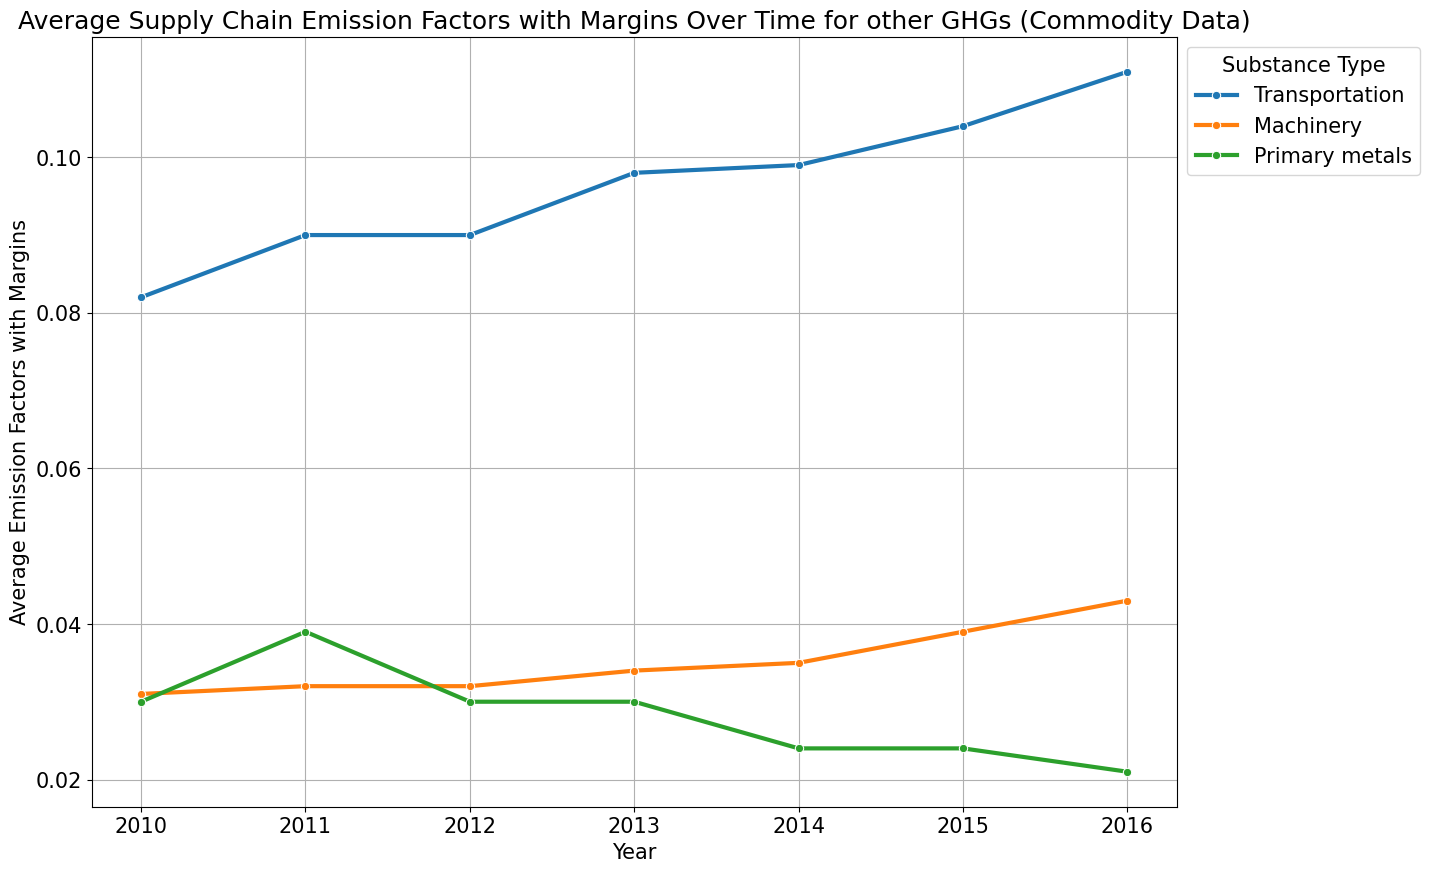

In [23]:
# Creating a copy of the data to adjust the values for better visualization
GHG = GHG[GHG['Commodity Name'].isin(['Transportation','Machinery','Primary metals'])]

#industry_df_adj = si.copy(deep=True)

# Adjusting the values of 'Supply Chain Emission Factors with Margins' for 'carbon dioxide' to enhance visualization

#commodity_df_adj.loc[commodity_df_adj['Substance'] == 'nitrous oxide', 'Supply Chain Emission Factors with Margins'] *= 100


# Set up the figure size for better visibility
plt.figure(figsize=(14, 10))

# Plot for Commodity data - Relationship with Time for 'Supply Chain Emission Factors with Margins' grouped by 'Substance'
sns.lineplot(data=GHG, x='Year', y='Supply Chain Emission Factors with Margins', 
             hue='Commodity Name', ci=None, marker='o', palette='tab10',linewidth = 3)

# Adding title and labels
plt.title('Average Supply Chain Emission Factors with Margins Over Time for other GHGs (Commodity Data)')
plt.xlabel('Year')
plt.ylabel('Average Emission Factors with Margins')
plt.grid(True)
plt.legend(title='Substance Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()
